# Neural Networks

Welcome to this exercise. We'll see how to recognize digits using the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset! <br>
Don't worry if you don't understand most of the code! You'll get there soon. <br>
We will write some GUI for the interface and some cool neural network! <br>

### Let's get started!

In [1]:
# set warnings off
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
# imports
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import img_to_array
from random import randrange
from PIL import Image, ImageDraw

Using TensorFlow backend.


We just imported the required modules. It's time to load the dataset!

In [2]:
# seed is to ensure that we generate the same stuff every time
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]

Wait, we just loaded the dataset, but we don't know what it looks like yet! Run the snippet below to see 9 random images from the dataset.

In [3]:
X_train[1].shape

(28, 28)

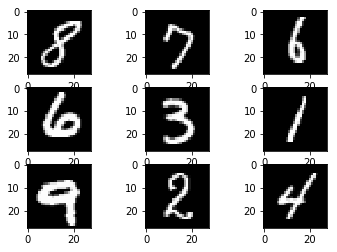

In [4]:
num_plot = 9
# plot random figures
for i in range(num_plot):
    plt.subplot(num_plot**0.5, num_plot**0.5, i+1)
    plt.imshow(X_train[randrange(len(X_train))], cmap=plt.get_cmap("gray"))
plt.show()

This data is raw and cannot be straightaway fed to our network. We need to preprocess it first!

In [5]:
# flatten images to vector
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

# normalize inputs
X_train = X_train/255
X_test = X_test/255

# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_train.shape[1]

We now need to define a neural network to run this stuff! Let's create a basic network with Keras!

In [ ]:
# create
model = Sequential()

"""
add layers to your model here
"""

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

We have defined our neural network. Here's a [tool](http://alexlenail.me/NN-SVG/index.html) to visualize it! <br>
If we had images of 4x4 pixels with hidden layers of 12 nodes, the neural network would look like this:<br>
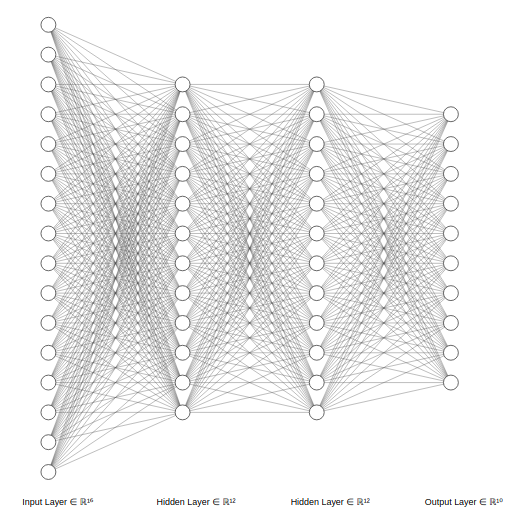 <br>
Next, we will train the model on the preprocessed data!

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=200,
          verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Here's a simple app to draw stuff on and predict the digit!

In [ ]:
class RecognizerApp:
    
    def __init__(self, model):
        self.DRAWING_AREA = (280, 280)
        self.predictions = [0 for x in range(10)]
        self.model = model
        self.first = False
        self.image = self.new_image()
        self.drawer = ImageDraw.Draw(self.image)
        # create the canvas
        master = tk.Tk()
        master.title("Digit recognizer")
        clear = tk.Button(master, text="CLEAR", command=self._clear_)
        clear.pack(side=tk.BOTTOM)
        self.canvas = tk.Canvas(master,
                   width=self.DRAWING_AREA[0],
                   height=self.DRAWING_AREA[1])
        self.canvas.configure(background="black")
        self.canvas.pack()
        self.canvas.bind("<B1-Motion>", self._paint_)
        self.canvas.bind("<ButtonRelease-1>", self._update_)
    
    def config_plot(self):
        plt.xlabel('Digits')
        plt.ylabel('Probability')
        plt.title('Predictions')
        plt.bar(range(0, 10), recognizer.get_predictions())
        plt.show()
        self.first = False
        
    def new_image(self):
        return Image.new("L", self.DRAWING_AREA)

    def _paint_(self, event):
        x1, y1 = (event.x - 5), (event.y - 5)
        x2, y2 = (event.x + 5), (event.y + 5)
        
        self.canvas.create_oval(x1, y1, x2, y2, fill="#FFFFFF", outline="")
        self.drawer.ellipse([x1, y1, x2, y2], fill=255, outline=255)
        
        temp_image = self.image.copy()
        temp_image.thumbnail((28, 28), Image.ANTIALIAS)
        temp_image = img_to_array(temp_image)
        temp_image = np.reshape(temp_image, (1, 28 * 28))
        
        self.predictions = self.model.predict(temp_image)[0].tolist()

    def _update_(self, event):
        if self.first:
            self.config_plot()
        else:
            plt.cla()
            plt.bar(range(0, 10), self.predictions)
            plt.draw()

    def _clear_(self):
        if self.first:
            self.config_plot()
        else:
            self.canvas.delete("all")
            self.predictions = [0 for x in range(10)]
            self.image = self.new_image()
            self.drawer = ImageDraw.Draw(self.image)
            plt.cla()
            plt.draw()
        
    def get_predictions(self):
        return self.predictions
    
    def mainloop(self):
        tk.mainloop()

In [ ]:
recognizer = RecognizerApp(model)
recognizer.mainloop()